## Target plnaet: TRAPPIST-1 b

# Section 1, elements of host star(Task 1 in Project Description)
Based on [NEA](https://exoplanetarchive.ipac.caltech.edu/overview/TRAPPIST-1), for TRAPPISST-1: 

### [Fe/H] :0.05350

Based on Griffith et al., 2020

![Screen%20Shot%202023-04-16%20at%206.26.01%20PM.png](attachment:Screen%20Shot%202023-04-16%20at%206.26.01%20PM.png)

### [Mg/Fe] :0.12

**Note that: $[N/M]=\log{\frac{N/M}{N_{\odot}/M_{\odot}}}$**

$[Mg/Fe]=\log{Mg}-\log{Fe}-(\log{Mg_{\odot}}-\log{Fe_{\odot}})$

$=-(\log{Mg_{\odot}}-\log{Fe_{\odot}}-(\log{Mg}-\log{Fe}))$

$=-[Fe/Mg]$

### [Fe/Mg] :-0.12

$[Mg/Fe]=\log{Mg}-\log{Fe}-(\log{Mg_{\odot}}-\log{Fe_{\odot}})$

$[Fe/H]=\log{Fe}-\log{H}-(\log{Fe_{\odot}}-\log{H_{\odot}})$

$[Mg/H]=\log{Mg}-\log{H}-(\log{Mg_{\odot}}-\log{H_{\odot}}) $

$=[Mg/Fe] + [Fe/H]$

$=0.1735$

### [Mg/H] :0.1735

Based on Griffith et al., 2022, 

![Screen%20Shot%202023-04-16%20at%206.26.13%20PM.png](attachment:Screen%20Shot%202023-04-16%20at%206.26.13%20PM.png)

### [Si/Mg] :-0.08


## Now find the mole ratio of Si/Mg, Fe/Mg

$[N/M]=\log{\frac{N/M}{N_{\odot}/M_{\odot}}}$

$N/M = N_{\odot}/M_{\odot} \cdot 10^{[N/M]}$

Based on [this](http://hyperphysics.phy-astr.gsu.edu/hbase/Tables/suncomp.html)

$Fe_{\odot}/Mg_{\odot} = 0.78947$

$Si_{\odot}/Mg_{\odot} = 1.18421$

Si/Mg=0.984983

Fe/Mg=0.598877

# Section 2(Task 2 in Project Description)

In [1]:
import os
import sys
import numpy as np
# hack to allow scripts to be placed in subdirectories next to burnman:
if not os.path.exists('ExoPlex') and os.path.exists('../ExoPlex'):
    sys.path.insert(1, os.path.abspath('..'))
Pressure_range_mantle_UM = '1000 1400000'
Temperature_range_mantle_UM = '1400 3000'

Pressure_range_mantle_LM = '1000000 7500000'
Temperature_range_mantle_LM = '2200 5000'

core_rad_frac_guess = 1.
water_rad_frac_guess = 0.1
water_potential_temp = 300.

combine_phases = True
use_grids = True
import ExoPlex as exo

In [2]:
if __name__ == "__main__":

    Mass_planet = 1.374 # in Earth masses
    #create filename to store values

    Output_filename = 'high_wFEO'
    #Next user must input the ratios by mole (Earth is Ca/Mg = .07, Si.Mg = 0.90, Al/Mg = 0.09, Fe/Mg = 0.9)
    CaMg = 0.07
    SiMg = 0.984983
    AlMg = 0.09
    FeMg = 0.598877


    #How much water do you want in your planet? By mass fraction.
    wt_frac_water = 0.0

    #Don't forget that if you have water you need to add water layers
    number_h2o_layers = 0

    #Now we can mix various elements into the core or mantle
    wt_frac_Si_core = 0. #by mass <1
    wt_frac_O_core = 0. #by mass
    wt_frac_S_core = 0. #by mass
    mol_frac_Fe_mantle =0.0#by mole

    #What potential temperature (in K) do you want to start your mantle adiabat?
    Mantle_potential_temp = 1600

    #Input the resolution of your upper mantle and lower mantle composition, density grids
    #These are input as number of T, P points. 50 50 = 2500 grid points, which takes about
    #5 minutes to calculate. Lower mantle resolution does not need to be higher since it's
    #mostly ppv.
    resolution_UM = '50 50'
    resolution_LM = '20 20'

    #lastly we need to decide how many layers to put in the planet. This is the resolution of
    #the mass-radius sampling.
    num_mantle_layers = 500
    num_core_layers = 600



    number_of_runs = 1
    Output_radii = []
    Output_mass = []


    ######### Initalize and run ExoPlex


    compositional_params = [wt_frac_water,FeMg,SiMg,CaMg,AlMg,mol_frac_Fe_mantle,wt_frac_Si_core, \
                          wt_frac_O_core,wt_frac_S_core,combine_phases,use_grids]

    if use_grids == True:
        filename = exo.functions.find_filename(compositional_params)
    else:
        filename=''

    structure_params =  [Pressure_range_mantle_UM,Temperature_range_mantle_UM,resolution_UM,
                         Pressure_range_mantle_LM, Temperature_range_mantle_LM, resolution_LM,
                         core_rad_frac_guess,Mantle_potential_temp,water_rad_frac_guess,water_potential_temp]


    layers = [num_mantle_layers,num_core_layers,number_h2o_layers]

    #This is where we actually run the planet. First PerPlex grids of mineralogy, density,
    #Cp and alpha are calculated and stored in the Solutions folder. If the file already exists
    #(in name, not necessarily in composition), then PerPlex is not run again.

    Planet = exo.run_planet_mass(Mass_planet,compositional_params,structure_params,layers,filename)

    #Planet is a dictionary containing many parameters of interest:
    #Planet.get('radius') = list of the radial points from calculation (m)
    #Planet.get('mass') = list of the cumulative mass at each radius point from calculation (kg)
    #Planet.get('density') = list of densities from calculation (kg/m^3)
    #Planet.get('temperature') = list of temperature points from calculation (K)
    #Planet.get('gravity') = list of gravity points from calculation (SI)
    #Planet.get('pressure') = list of pressure points from calculation (bar)
    #Planet.get('alpha') = list of values of thermal expansivity points from calculation (1/K)
    #Planet.get('cp') = list of values of specific heat points from calculation (SI)
    #Planet.get('phases') = list of phases and their molar fractions
    print()
    print("Mass = ", '%.3f'%(Planet['mass'][-1]/5.97e24), "Earth masses")
    print("Radius = ", '%.3f'%(Planet['radius'][-1]/6371e3), "Earth radii")
    print("Core Mass Fraction = ", '%.2f'%(100.*Planet['mass'][num_core_layers]/Planet['mass'][-1]))
    print("Core Radius Fraction = ", '%.2f'%(100.*Planet['radius'][num_core_layers]/Planet['radius'][-1]))
    print("CMB Pressure = " ,'%.2f' % (Planet['pressure'][num_core_layers]/10000), "GPa")

    print("number of oceans:",'%.2f' % (wt_frac_water*Planet['mass'][-1]/1.4e21))
    #If you'd like the full output, uncomment out these lines!
    Output_filename = Output_filename + '_Radius_'+ str('%.2f'%(Planet['radius'][-1]/6371e3))
    exo.functions.write(Planet,Output_filename)


Core composition:  {'Fe': 100.0, 'Si': 0.0, 'O': 0.0, 'S': 0.0}
Mantle composition:  {'FeO': 0.0, 'SiO2': 54.79812765, 'MgO': 37.31904665, 'CaO': 3.63457148, 'Al2O3': 4.24825422}
Mantle Fe# -0.0
Core Mass Percent =  23.644

Your closest grid filename is:  0.07CaMg_0.00FeMg_0.09AlMg_1.0SiMg_0.0NaMg_0.00Fe_U/LM_results.txt


Core composition:  {'Fe': 100.0, 'Si': 0.0, 'O': 0.0, 'S': 0.0}
Mantle composition:  {'FeO': 0.0, 'SiO2': 54.79812765, 'MgO': 37.31904665, 'CaO': 3.63457148, 'Al2O3': 4.24825422}
Mantle Fe# -0.0
Core Mass Percent =  23.644

The Upper mantle .tab already exists, please wait briefly for solution

../Solutions_Small/0.07CaMg_0.00FeMg_0.09AlMg_1.0SiMg_0.0NaMg_0.00Fe
The Lower mantle .tab already exists, please wait briefly for solution

iteration # 1
iteration # 2
iteration # 3
iteration # 4
iteration # 5
iteration # 6
iteration # 7
iteration # 8
iteration # 9
iteration # 10
iteration # 11
iteration # 12
iteration # 13
iteration # 14
iteration # 15

Mass =  1.374 Earth 

**Planet Mass =  1.374 Earth masses**

**Planet Radius =  1.117 Earth radii**

### Based on the luminosity of TRAPPIST-1 b, we could find the  surface irradiation(flux) of TRAPPISR-1 b

luminosity have two section.

The luminosity of TRAPPIST-1 b:

1. thermal luminosity
2. reflective luminosity

### thermal luminosity

$L_t = 4 \cdot r^2 \pi \cdot \sigma_{SB} \cdot T^4$, based on [this](https://www.astronomy.ohio-state.edu/thompson.1847/1144/Lecture9.html#:~:text=L%20%3D%20F%20x%20Area%20%3D%204,power%20and%20its%20Radius%20squared.%22)

T: temperature of planet

$\sigma_{SB}$: Stefan-Boltzmann constant

r: radius of planet

$L_t$: thermal luminosity of planet

The temprature of our planet are the same as TRAPPIST-1 b(since we choose TRAPPIST-1 b as simulation target):

397.6K based on [NEA](https://exoplanetarchive.ipac.caltech.edu/overview/TRAPPIST-1)

In [3]:
import os
import sys
import numpy as np
import astropy.constants as c
import astropy.units as u

In [4]:
tl = (4 * np.pi *(1.117*c.R_earth)**2 * c.sigma_sb * (397.6 * u.K)**4).to(u.W)
print(tl)

9.038494498528959e+17 W


### reflective luminosity

$L_s = 4 \cdot r_s^2 \pi \cdot \sigma_{SB} \cdot T_s^4$

$L_s$: luminosity of star

$r_s$: radius of star

$T_s$: temprature of star

star: TRAPPIST-1

$L_p= \frac{L_s}{4 \pi a^2} \cdot \pi r^2 $ 

a: semi-major axis of our planet, here a equals to the semi-major axis of TRAPPIST-1 b

In [5]:
lf = (((4 * np.pi *(0.1192*c.R_sun)**2 * c.sigma_sb * (2566 * u.K)**4) /(4 * np.pi * (0.01154*c.au)**2)) * np.pi * (1.117*c.R_earth)**2).to(u.W)
print(lf)

9.045056577232369e+17 W


the flux of our planet on its surface:
    
$F = \frac{L_s + L_p}{4 \pi r^2}$

In [6]:
f = ((lf+tl)/(4 * np.pi * (1.117*c.R_earth)**2 )).to(u.W/u.m**2)
print(f)

2835.2075627065533 W / m2


# Section 3（Task 3 in Project Description）

The mass of TRAPPIST-1 b: 

Max: 1.443 mass of earth

Min: 1.305 mass of earth

**Max mass:**

In [7]:
if __name__ == "__main__":

    Mass_planet = 1.443 # in Earth masses
    #create filename to store values

    Output_filename = 'high_wFEO'
    #Next user must input the ratios by mole (Earth is Ca/Mg = .07, Si.Mg = 0.90, Al/Mg = 0.09, Fe/Mg = 0.9)
    CaMg = 0.07
    SiMg = 0.984983
    AlMg = 0.09
    FeMg = 0.598877


    #How much water do you want in your planet? By mass fraction.
    wt_frac_water = 0.0

    #Don't forget that if you have water you need to add water layers
    number_h2o_layers = 0

    #Now we can mix various elements into the core or mantle
    wt_frac_Si_core = 0. #by mass <1
    wt_frac_O_core = 0. #by mass
    wt_frac_S_core = 0. #by mass
    mol_frac_Fe_mantle =0.0#by mole

    #What potential temperature (in K) do you want to start your mantle adiabat?
    Mantle_potential_temp = 1600

    #Input the resolution of your upper mantle and lower mantle composition, density grids
    #These are input as number of T, P points. 50 50 = 2500 grid points, which takes about
    #5 minutes to calculate. Lower mantle resolution does not need to be higher since it's
    #mostly ppv.
    resolution_UM = '50 50'
    resolution_LM = '20 20'

    #lastly we need to decide how many layers to put in the planet. This is the resolution of
    #the mass-radius sampling.
    num_mantle_layers = 500
    num_core_layers = 600



    number_of_runs = 1
    Output_radii = []
    Output_mass = []


    ######### Initalize and run ExoPlex


    compositional_params = [wt_frac_water,FeMg,SiMg,CaMg,AlMg,mol_frac_Fe_mantle,wt_frac_Si_core, \
                          wt_frac_O_core,wt_frac_S_core,combine_phases,use_grids]

    if use_grids == True:
        filename = exo.functions.find_filename(compositional_params)
    else:
        filename=''

    structure_params =  [Pressure_range_mantle_UM,Temperature_range_mantle_UM,resolution_UM,
                         Pressure_range_mantle_LM, Temperature_range_mantle_LM, resolution_LM,
                         core_rad_frac_guess,Mantle_potential_temp,water_rad_frac_guess,water_potential_temp]


    layers = [num_mantle_layers,num_core_layers,number_h2o_layers]

    #This is where we actually run the planet. First PerPlex grids of mineralogy, density,
    #Cp and alpha are calculated and stored in the Solutions folder. If the file already exists
    #(in name, not necessarily in composition), then PerPlex is not run again.

    Planet = exo.run_planet_mass(Mass_planet,compositional_params,structure_params,layers,filename)

    #Planet is a dictionary containing many parameters of interest:
    #Planet.get('radius') = list of the radial points from calculation (m)
    #Planet.get('mass') = list of the cumulative mass at each radius point from calculation (kg)
    #Planet.get('density') = list of densities from calculation (kg/m^3)
    #Planet.get('temperature') = list of temperature points from calculation (K)
    #Planet.get('gravity') = list of gravity points from calculation (SI)
    #Planet.get('pressure') = list of pressure points from calculation (bar)
    #Planet.get('alpha') = list of values of thermal expansivity points from calculation (1/K)
    #Planet.get('cp') = list of values of specific heat points from calculation (SI)
    #Planet.get('phases') = list of phases and their molar fractions
    print()
    print("Mass = ", '%.3f'%(Planet['mass'][-1]/5.97e24), "Earth masses")
    print("Radius = ", '%.3f'%(Planet['radius'][-1]/6371e3), "Earth radii")
    print("Core Mass Fraction = ", '%.2f'%(100.*Planet['mass'][num_core_layers]/Planet['mass'][-1]))
    print("Core Radius Fraction = ", '%.2f'%(100.*Planet['radius'][num_core_layers]/Planet['radius'][-1]))
    print("CMB Pressure = " ,'%.2f' % (Planet['pressure'][num_core_layers]/10000), "GPa")

    print("number of oceans:",'%.2f' % (wt_frac_water*Planet['mass'][-1]/1.4e21))
    #If you'd like the full output, uncomment out these lines!
    Output_filename = Output_filename + '_Radius_'+ str('%.2f'%(Planet['radius'][-1]/6371e3))
    exo.functions.write(Planet,Output_filename)


Core composition:  {'Fe': 100.0, 'Si': 0.0, 'O': 0.0, 'S': 0.0}
Mantle composition:  {'FeO': 0.0, 'SiO2': 54.79812765, 'MgO': 37.31904665, 'CaO': 3.63457148, 'Al2O3': 4.24825422}
Mantle Fe# -0.0
Core Mass Percent =  23.644

Your closest grid filename is:  0.07CaMg_0.00FeMg_0.09AlMg_1.0SiMg_0.0NaMg_0.00Fe_U/LM_results.txt


Core composition:  {'Fe': 100.0, 'Si': 0.0, 'O': 0.0, 'S': 0.0}
Mantle composition:  {'FeO': 0.0, 'SiO2': 54.79812765, 'MgO': 37.31904665, 'CaO': 3.63457148, 'Al2O3': 4.24825422}
Mantle Fe# -0.0
Core Mass Percent =  23.644

The Upper mantle .tab already exists, please wait briefly for solution

../Solutions_Small/0.07CaMg_0.00FeMg_0.09AlMg_1.0SiMg_0.0NaMg_0.00Fe
The Lower mantle .tab already exists, please wait briefly for solution

iteration # 1
iteration # 2
iteration # 3
iteration # 4
iteration # 5
iteration # 6
iteration # 7
iteration # 8
iteration # 9
iteration # 10
iteration # 11
iteration # 12
iteration # 13
iteration # 14
iteration # 15
iteration # 16

Mass 

**Min Mass:**

In [8]:
if __name__ == "__main__":

    Mass_planet = 1.305 # in Earth masses
    #create filename to store values

    Output_filename = 'high_wFEO'
    #Next user must input the ratios by mole (Earth is Ca/Mg = .07, Si.Mg = 0.90, Al/Mg = 0.09, Fe/Mg = 0.9)
    CaMg = 0.07
    SiMg = 0.984983
    AlMg = 0.09
    FeMg = 0.598877


    #How much water do you want in your planet? By mass fraction.
    wt_frac_water = 0.0

    #Don't forget that if you have water you need to add water layers
    number_h2o_layers = 0

    #Now we can mix various elements into the core or mantle
    wt_frac_Si_core = 0. #by mass <1
    wt_frac_O_core = 0. #by mass
    wt_frac_S_core = 0. #by mass
    mol_frac_Fe_mantle =0.0#by mole

    #What potential temperature (in K) do you want to start your mantle adiabat?
    Mantle_potential_temp = 1600

    #Input the resolution of your upper mantle and lower mantle composition, density grids
    #These are input as number of T, P points. 50 50 = 2500 grid points, which takes about
    #5 minutes to calculate. Lower mantle resolution does not need to be higher since it's
    #mostly ppv.
    resolution_UM = '50 50'
    resolution_LM = '20 20'

    #lastly we need to decide how many layers to put in the planet. This is the resolution of
    #the mass-radius sampling.
    num_mantle_layers = 500
    num_core_layers = 600



    number_of_runs = 1
    Output_radii = []
    Output_mass = []


    ######### Initalize and run ExoPlex


    compositional_params = [wt_frac_water,FeMg,SiMg,CaMg,AlMg,mol_frac_Fe_mantle,wt_frac_Si_core, \
                          wt_frac_O_core,wt_frac_S_core,combine_phases,use_grids]

    if use_grids == True:
        filename = exo.functions.find_filename(compositional_params)
    else:
        filename=''

    structure_params =  [Pressure_range_mantle_UM,Temperature_range_mantle_UM,resolution_UM,
                         Pressure_range_mantle_LM, Temperature_range_mantle_LM, resolution_LM,
                         core_rad_frac_guess,Mantle_potential_temp,water_rad_frac_guess,water_potential_temp]


    layers = [num_mantle_layers,num_core_layers,number_h2o_layers]

    #This is where we actually run the planet. First PerPlex grids of mineralogy, density,
    #Cp and alpha are calculated and stored in the Solutions folder. If the file already exists
    #(in name, not necessarily in composition), then PerPlex is not run again.

    Planet = exo.run_planet_mass(Mass_planet,compositional_params,structure_params,layers,filename)

    #Planet is a dictionary containing many parameters of interest:
    #Planet.get('radius') = list of the radial points from calculation (m)
    #Planet.get('mass') = list of the cumulative mass at each radius point from calculation (kg)
    #Planet.get('density') = list of densities from calculation (kg/m^3)
    #Planet.get('temperature') = list of temperature points from calculation (K)
    #Planet.get('gravity') = list of gravity points from calculation (SI)
    #Planet.get('pressure') = list of pressure points from calculation (bar)
    #Planet.get('alpha') = list of values of thermal expansivity points from calculation (1/K)
    #Planet.get('cp') = list of values of specific heat points from calculation (SI)
    #Planet.get('phases') = list of phases and their molar fractions
    print()
    print("Mass = ", '%.3f'%(Planet['mass'][-1]/5.97e24), "Earth masses")
    print("Radius = ", '%.3f'%(Planet['radius'][-1]/6371e3), "Earth radii")
    print("Core Mass Fraction = ", '%.2f'%(100.*Planet['mass'][num_core_layers]/Planet['mass'][-1]))
    print("Core Radius Fraction = ", '%.2f'%(100.*Planet['radius'][num_core_layers]/Planet['radius'][-1]))
    print("CMB Pressure = " ,'%.2f' % (Planet['pressure'][num_core_layers]/10000), "GPa")

    print("number of oceans:",'%.2f' % (wt_frac_water*Planet['mass'][-1]/1.4e21))
    #If you'd like the full output, uncomment out these lines!
    Output_filename = Output_filename + '_Radius_'+ str('%.2f'%(Planet['radius'][-1]/6371e3))
    exo.functions.write(Planet,Output_filename)


Core composition:  {'Fe': 100.0, 'Si': 0.0, 'O': 0.0, 'S': 0.0}
Mantle composition:  {'FeO': 0.0, 'SiO2': 54.79812765, 'MgO': 37.31904665, 'CaO': 3.63457148, 'Al2O3': 4.24825422}
Mantle Fe# -0.0
Core Mass Percent =  23.644

Your closest grid filename is:  0.07CaMg_0.00FeMg_0.09AlMg_1.0SiMg_0.0NaMg_0.00Fe_U/LM_results.txt


Core composition:  {'Fe': 100.0, 'Si': 0.0, 'O': 0.0, 'S': 0.0}
Mantle composition:  {'FeO': 0.0, 'SiO2': 54.79812765, 'MgO': 37.31904665, 'CaO': 3.63457148, 'Al2O3': 4.24825422}
Mantle Fe# -0.0
Core Mass Percent =  23.644

The Upper mantle .tab already exists, please wait briefly for solution

../Solutions_Small/0.07CaMg_0.00FeMg_0.09AlMg_1.0SiMg_0.0NaMg_0.00Fe
The Lower mantle .tab already exists, please wait briefly for solution

iteration # 1
iteration # 2
iteration # 3
iteration # 4
iteration # 5
iteration # 6
iteration # 7
iteration # 8
iteration # 9
iteration # 10
iteration # 11
iteration # 12
iteration # 13
iteration # 14
iteration # 15

Mass =  1.305 Earth 

Mass =  1.443 Earth masses,
Radius =  1.133 Earth radii

Mass =  1.374 Earth masses,
Radius =  1.117 Earth radii

Mass =  1.305 Earth masses,
Radius =  1.101 Earth radii

In [9]:
def density(R,M):
    """
    R: radius of planet
    M: mass of planet
    """
    D=(M/(4/3 * np.pi * R**3)).to(u.g/u.cm**3)
    return D

In [10]:
print("the density of planet with max mass:",density(1.133*c.R_earth,1.443*c.M_earth))
print("the density of planet with normal mass:",density(1.117*c.R_earth,1.374*c.M_earth))
print("the density of planet with min mass:",density(1.101*c.R_earth,1.305*c.M_earth))

the density of planet with max mass: 5.451876714447971 g / cm3
the density of planet with normal mass: 5.4174715372404405 g / cm3
the density of planet with min mass: 5.3730140924676 g / cm3


# Section 4 Make a Planet（Task 4 in Project Description）

This file is part of ExoPlex - a self consistent planet builder
Copyright (C) 2017 - by the ExoPlex team, released under the GNU
GPL v2 or later.

In [11]:
import os
import sys
import numpy as np
# hack to allow scripts to be placed in subdirectories next to burnman:
if not os.path.exists('ExoPlex') and os.path.exists('../ExoPlex'):
    sys.path.insert(1, os.path.abspath('..'))
Pressure_range_mantle_UM = '1000 1400000'
Temperature_range_mantle_UM = '1400 3000'

In [12]:
Pressure_range_mantle_LM = '1000000 7500000'
Temperature_range_mantle_LM = '2200 5000'

In [13]:
core_rad_frac_guess = 1.
water_rad_frac_guess = 0.1
water_potential_temp = 300.

In [14]:
combine_phases = True
use_grids = True
import ExoPlex as exo

Mass of **TRAPPIST-1 b: 1.374 Earth Mass** based on [NEA](https://exoplanetarchive.ipac.caltech.edu/overview/trappist-1)


Core composition:  {'Fe': 100.0, 'Si': 0.0, 'O': 0.0, 'S': 0.0}
Mantle composition:  {'FeO': 0.0, 'SiO2': 54.79812765, 'MgO': 37.31904665, 'CaO': 3.63457148, 'Al2O3': 4.24825422}
Mantle Fe# -0.0
Core Mass Percent =  23.644

Your closest grid filename is:  0.07CaMg_0.00FeMg_0.09AlMg_1.0SiMg_0.0NaMg_0.00Fe_U/LM_results.txt


Core composition:  {'Fe': 100.0, 'Si': 0.0, 'O': 0.0, 'S': 0.0}
Mantle composition:  {'FeO': 0.0, 'SiO2': 54.79812765, 'MgO': 37.31904665, 'CaO': 3.63457148, 'Al2O3': 4.24825422}
Mantle Fe# -0.0
Core Mass Percent =  23.644

The Upper mantle .tab already exists, please wait briefly for solution

../Solutions_Small/0.07CaMg_0.00FeMg_0.09AlMg_1.0SiMg_0.0NaMg_0.00Fe
The Lower mantle .tab already exists, please wait briefly for solution

iteration # 1
iteration # 2
iteration # 3
iteration # 4
iteration # 5
iteration # 6
iteration # 7
iteration # 8
iteration # 9
iteration # 10
iteration # 11
iteration # 12
iteration # 13
iteration # 14
iteration # 15

Mass =  1.374 Earth 

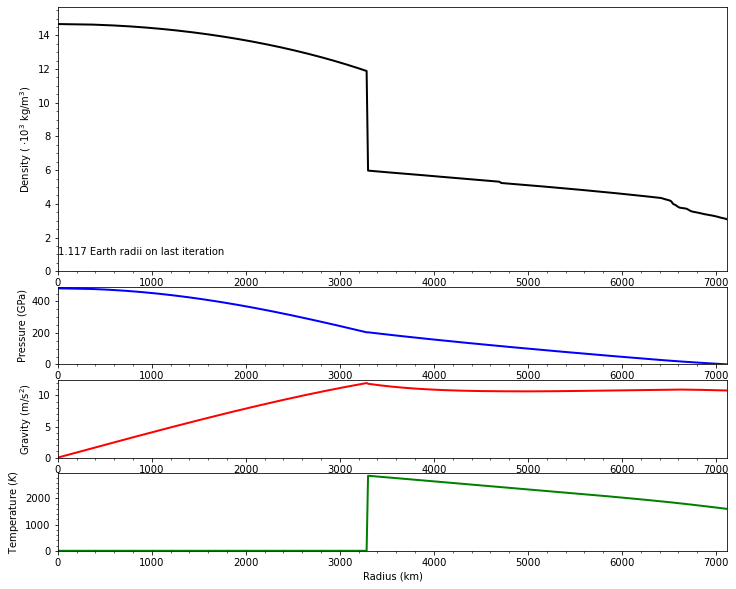

In [15]:
if __name__ == "__main__":

    Mass_planet = 1.374 # in Earth masses
    #create filename to store values

    Output_filename = 'high_wFEO'
    #Next user must input the ratios by mole (Earth is Ca/Mg = .07, Si.Mg = 0.90, Al/Mg = 0.09, Fe/Mg = 0.9)
    CaMg = 0.07
    SiMg = 0.984983
    AlMg = 0.09
    FeMg = 0.598877


    #How much water do you want in your planet? By mass fraction.
    wt_frac_water = 0.0

    #Don't forget that if you have water you need to add water layers
    number_h2o_layers = 0

    #Now we can mix various elements into the core or mantle
    wt_frac_Si_core = 0. #by mass <1
    wt_frac_O_core = 0. #by mass
    wt_frac_S_core = 0. #by mass
    mol_frac_Fe_mantle =0.0#by mole

    #What potential temperature (in K) do you want to start your mantle adiabat?
    Mantle_potential_temp = 1600

    #Input the resolution of your upper mantle and lower mantle composition, density grids
    #These are input as number of T, P points. 50 50 = 2500 grid points, which takes about
    #5 minutes to calculate. Lower mantle resolution does not need to be higher since it's
    #mostly ppv.
    resolution_UM = '50 50'
    resolution_LM = '20 20'

    #lastly we need to decide how many layers to put in the planet. This is the resolution of
    #the mass-radius sampling.
    num_mantle_layers = 500
    num_core_layers = 600



    number_of_runs = 1
    Output_radii = []
    Output_mass = []


    ######### Initalize and run ExoPlex


    compositional_params = [wt_frac_water,FeMg,SiMg,CaMg,AlMg,mol_frac_Fe_mantle,wt_frac_Si_core, \
                          wt_frac_O_core,wt_frac_S_core,combine_phases,use_grids]

    if use_grids == True:
        filename = exo.functions.find_filename(compositional_params)
    else:
        filename=''

    structure_params =  [Pressure_range_mantle_UM,Temperature_range_mantle_UM,resolution_UM,
                         Pressure_range_mantle_LM, Temperature_range_mantle_LM, resolution_LM,
                         core_rad_frac_guess,Mantle_potential_temp,water_rad_frac_guess,water_potential_temp]


    layers = [num_mantle_layers,num_core_layers,number_h2o_layers]

    #This is where we actually run the planet. First PerPlex grids of mineralogy, density,
    #Cp and alpha are calculated and stored in the Solutions folder. If the file already exists
    #(in name, not necessarily in composition), then PerPlex is not run again.

    Planet = exo.run_planet_mass(Mass_planet,compositional_params,structure_params,layers,filename)

    #Planet is a dictionary containing many parameters of interest:
    #Planet.get('radius') = list of the radial points from calculation (m)
    #Planet.get('mass') = list of the cumulative mass at each radius point from calculation (kg)
    #Planet.get('density') = list of densities from calculation (kg/m^3)
    #Planet.get('temperature') = list of temperature points from calculation (K)
    #Planet.get('gravity') = list of gravity points from calculation (SI)
    #Planet.get('pressure') = list of pressure points from calculation (bar)
    #Planet.get('alpha') = list of values of thermal expansivity points from calculation (1/K)
    #Planet.get('cp') = list of values of specific heat points from calculation (SI)
    #Planet.get('phases') = list of phases and their molar fractions
    print()
    print("Mass = ", '%.3f'%(Planet['mass'][-1]/5.97e24), "Earth masses")
    print("Radius = ", '%.3f'%(Planet['radius'][-1]/6371e3), "Earth radii")
    print("Core Mass Fraction = ", '%.2f'%(100.*Planet['mass'][num_core_layers]/Planet['mass'][-1]))
    print("Core Radius Fraction = ", '%.2f'%(100.*Planet['radius'][num_core_layers]/Planet['radius'][-1]))
    print("CMB Pressure = " ,'%.2f' % (Planet['pressure'][num_core_layers]/10000), "GPa")

    print("number of oceans:",'%.2f' % (wt_frac_water*Planet['mass'][-1]/1.4e21))
    #If you'd like the full output, uncomment out these lines!
    Output_filename = Output_filename + '_Radius_'+ str('%.2f'%(Planet['radius'][-1]/6371e3))
    exo.functions.write(Planet,Output_filename)

    #Now let us plot
    import matplotlib.pyplot as plt

    figure = plt.figure(figsize=(12, 10))

    ax1 = plt.subplot2grid((6, 3), (0, 0), colspan=3, rowspan=3)
    ax2 = plt.subplot2grid((6, 3), (3, 0), colspan=3, rowspan=1)
    ax3 = plt.subplot2grid((6, 3), (4, 0), colspan=3, rowspan=1)
    ax4 = plt.subplot2grid((6, 3), (5, 0), colspan=3, rowspan=1)

    ax1.plot(Planet['radius'] / 1.e3, Planet['density'] / 1.e3, 'k', linewidth=2.)
    ax1.set_ylim(0., (max(Planet['density']) / 1.e3) + 1.)
    ax1.set_xlim(0., max(Planet['radius']) / 1.e3)
    ax1.set_ylabel("Density ( $\cdot 10^3$ kg/m$^3$)")
    ax1.minorticks_on()
    text = '%.3f' % (Planet['radius'][-1] / 6371e3) + ' Earth radii on last iteration'
    ax1.text(0.05, 0.95, text)

    # Make a subplot showing the calculated pressure profile
    ax2.plot(Planet['radius'] / 1.e3, Planet['pressure'] / 1.e4, 'b', linewidth=2.)
    ax2.set_ylim(0., (max(Planet['pressure']) / 1e4) + 10.)
    ax2.set_xlim(0., max(Planet['radius']) / 1.e3)
    ax2.set_ylabel("Pressure (GPa)")
    ax2.minorticks_on()

    # Make a subplot showing the calculated gravity profile
    ax3.plot(Planet['radius'] / 1.e3, Planet['gravity'], 'r', linewidth=2.)
    ax3.set_ylabel("Gravity (m/s$^2)$")
    ax3.set_xlim(0., max(Planet['radius']) / 1.e3)
    ax3.set_ylim(0., max(Planet['gravity']) + 0.5)
    ax3.minorticks_on()

    # Make a subplot showing the calculated temperature profile
    ax4.plot(Planet['radius'] / 1.e3, Planet['temperature'], 'g', linewidth=2.)
    ax4.set_ylabel("Temperature ($K$)")
    ax4.set_xlabel("Radius (km)")
    ax4.set_xlim(0., max(Planet['radius']) / 1.e3)
    ax4.set_ylim(0., max(Planet['temperature']) + 100)
    ax4.minorticks_on()

    plt.show()

# Section 5 Mantle Mineralogy Compare to the Earth（Task 5 Project Description）

**mineralogy** of Earth(from example)

'FeO': 0.0, 

'SiO2': 52.55497015, 

'MgO': 39.17101638, 

'CaO': 3.81493827, 

'Al2O3': 4.45907521

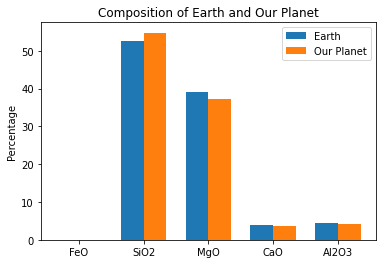

In [16]:
import matplotlib.pyplot as plt
import numpy as np

earth = [0.0, 52.55497015, 39.17101638, 3.81493827, 4.45907521]
our_planet = [0.0, 54.79812765, 37.31904665, 3.63457148, 4.24825422]

labels = ['FeO', 'SiO2', 'MgO', 'CaO', 'Al2O3']

x = np.arange(len(labels))

width = 0.35

fig, ax = plt.subplots()

ax.bar(x - width/2, earth, width, label='Earth')

ax.bar(x + width/2, our_planet, width, label='Our Planet')

ax.set_ylabel('Percentage')
ax.set_title('Composition of Earth and Our Planet')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()